Импорт библиотек

In [1]:
import pandas
import numpy
from functions import *
from matplotlib import pyplot
from scipy.stats import norm, sigmaclip
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, normalize


Чтение таблицы

In [2]:
categorical = ['cat5_customerSatisfaction', 'cat1_gender']
numeric = ['num1_10', 'num2_10', 'num3_10']
data_frame = pandas.read_excel("first_practice_dataframe.xlsx")
data_frame = data_frame[categorical + numeric]
pandas.set_option('display.max_rows', 10)

Приведение данных к правильному формату

Уникальные значения в категориальных столбцах до преобразования:
cat5_customerSatisfaction - ['good' 'Good' 'Very good' 'Neutral' '-' 'Very poor' 'poor' 'Poor' ' ' nan]
cat1_gender - ['male' nan 'female' 'Male' '-' 'Female' ' ']


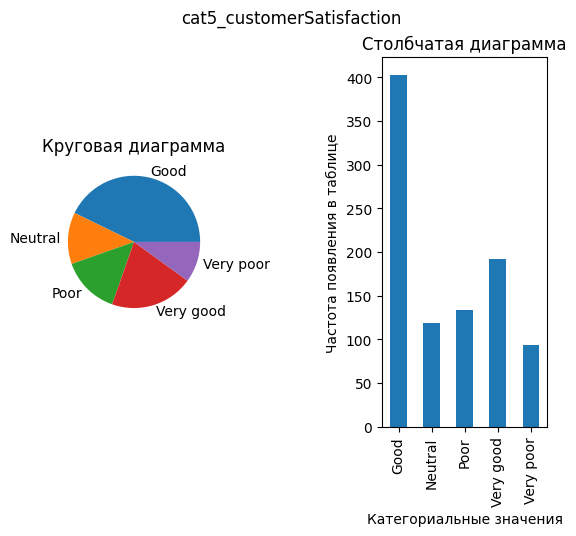

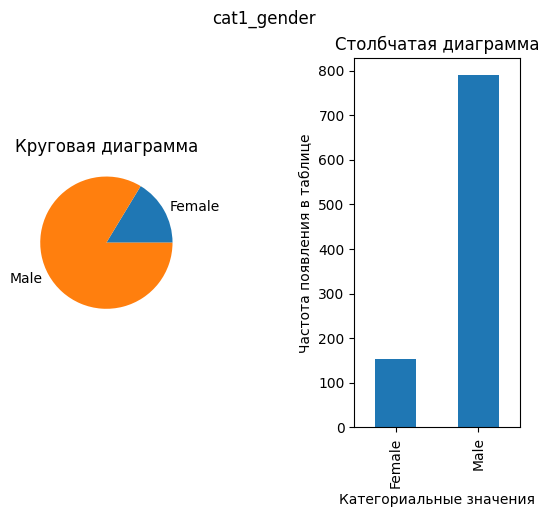

Уникальные значения в категориальных столбцах после преобразования:
cat5_customerSatisfaction - ['Good' 'Very good' 'Neutral' nan 'Very poor' 'Poor']
cat1_gender - ['Male' nan 'Female']


In [3]:
print(f"Уникальные значения в категориальных столбцах до преобразования:\n{categorical[0]} - {data_frame[categorical[0]].unique()}\n{categorical[1]} - {data_frame[categorical[1]].unique()}")
for column in range(len(categorical)):
    data_frame.loc[data_frame[categorical[column]].notnull(), categorical[column]] = data_frame.loc[data_frame[categorical[column]].notnull(), categorical[column]].apply(lambda x: x.capitalize())
data_frame = data_frame.replace(['-', ' '],
                                [ numpy.nan, numpy.nan])
data_frame[numeric[2]] = pandas.to_numeric(data_frame[numeric[2]], errors='coerce')
categorical_plot(data_frame, categorical[0])
categorical_plot(data_frame, categorical[1])
print(f"Уникальные значения в категориальных столбцах после преобразования:\n{categorical[0]} - {data_frame[categorical[0]].unique()}\n{categorical[1]} - {data_frame[categorical[1]].unique()}")

Удалено -61 элементов
Длина таблицы, обработанной методом сигм - 936, методом квартилей - 939


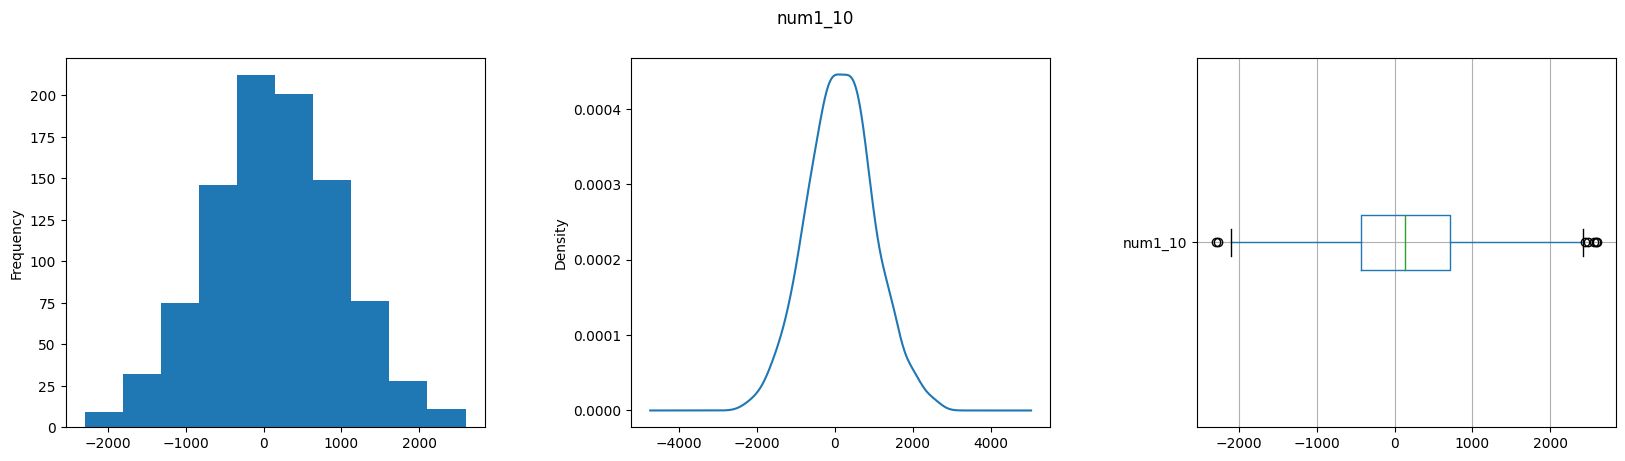

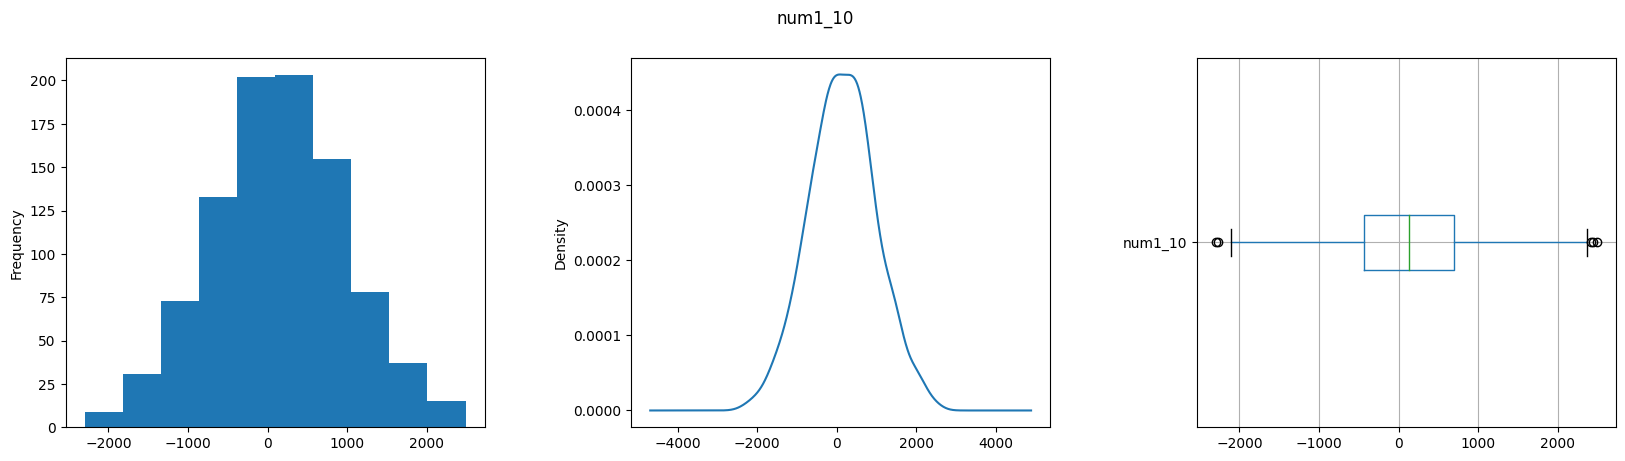

In [5]:
# num1_10
initial_length = len(data_frame)
quart_frame = quart_clip(data_frame, numeric[0])
data_frame = sigma_clip(data_frame, numeric[0])
final_length = len(data_frame)
print(f"Удалено {initial_length - final_length} элементов")
print(f"Длина таблицы, обработанной методом сигм - {len(quart_frame)}, методом квартилей - {len(data_frame)}")
numeric_plot(data_frame, numeric[0])
numeric_plot(quart_frame, numeric[0])
pyplot.show()

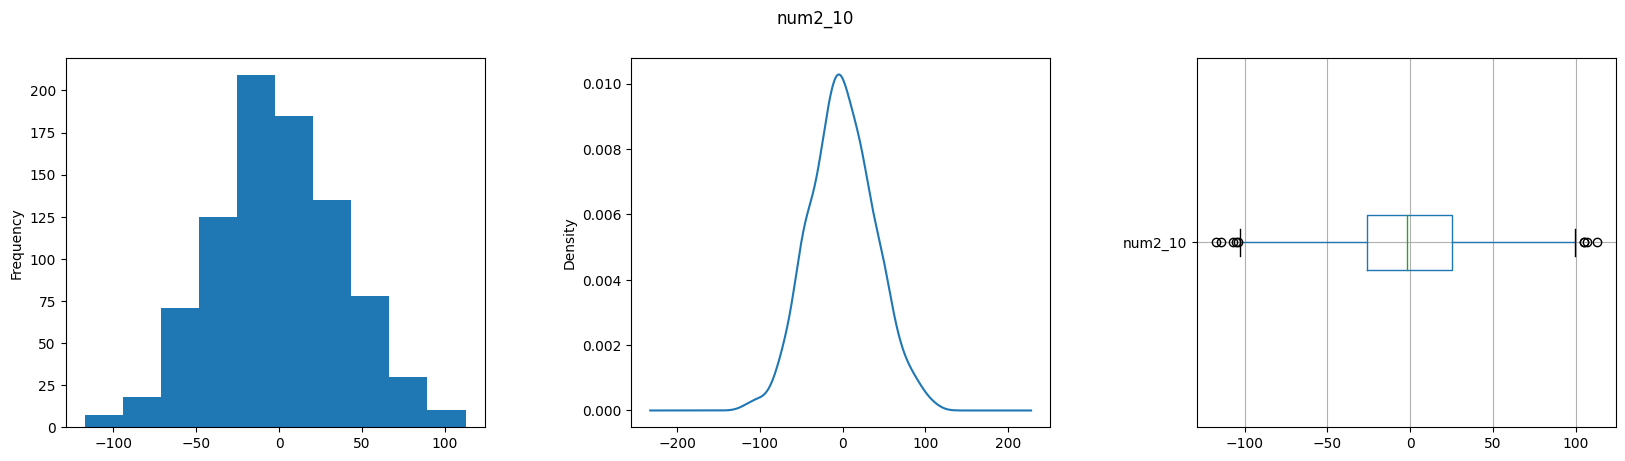

Удалено 26 элементов


In [6]:
# num2_10
initial_length = len(data_frame)
data_frame = sigma_clip(data_frame, numeric[1])
numeric_plot(data_frame, numeric[1])
final_length = len(data_frame)
print(f"Удалено {initial_length - final_length} элементов")

Удалено 17 элементов


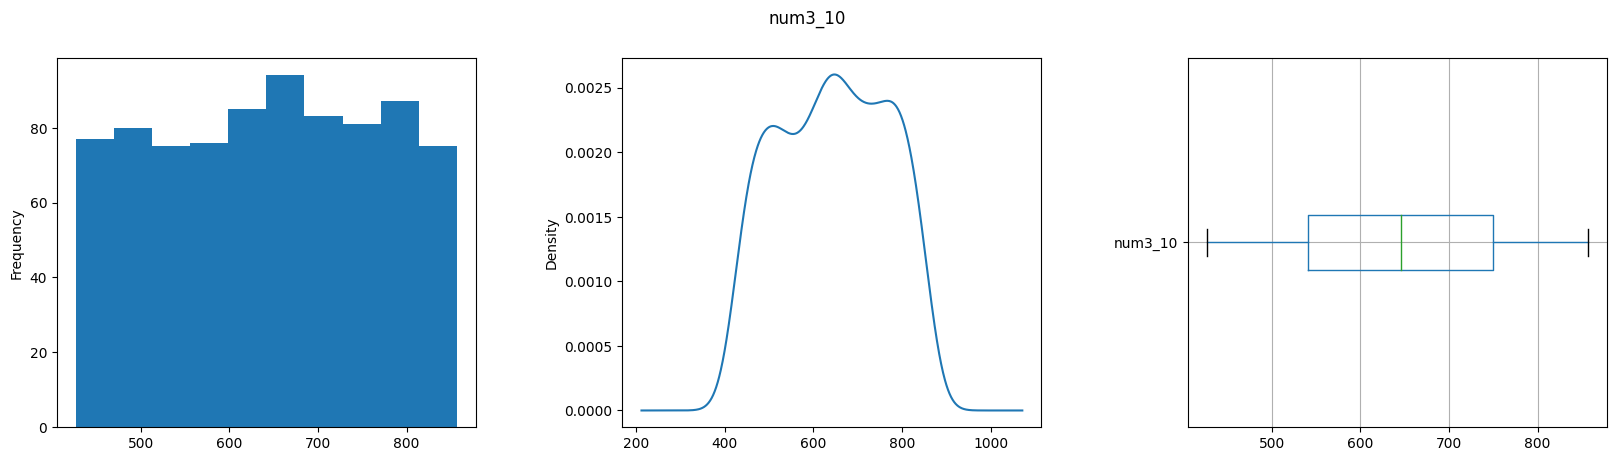

In [7]:
# num3_10
data_frame[numeric[2]] = pandas.to_numeric(data_frame[numeric[2]], errors='coerce')
initial_length = len(data_frame)
data_frame = sigma_clip(data_frame, numeric[2])
final_length = len(data_frame)
print(f"Удалено {initial_length - final_length} элементов")
numeric_plot(data_frame, numeric[2])

Замена пропусков модой - самым частым значением

In [9]:
nan_values = data_frame[categorical[1]].isna().sum()
mode = data_frame[categorical[1]].mode()[0]
data_frame[categorical[1]] = data_frame[categorical[1]].fillna(mode)
print(f"Заменено {nan_values} значений")

Заменено 51 значений


Замена пропусков средним значением

In [10]:
# num1_10 заполнение средним значением
nan_values = data_frame[numeric[0]].isna().sum()
mean = data_frame[numeric[0]].mean()
data_frame[numeric[0]] = data_frame[numeric[0]].fillna(mean)
print(f"Заменено {nan_values} значений")

Заменено 0 значений


Заполнение пропусков медианой

In [11]:
# num2_10 заполнение медианой
nan_values = data_frame[numeric[1]].isna().sum()
median = data_frame[numeric[1]].median()
data_frame[numeric[1]] = data_frame[numeric[1]].fillna(median)
print(f"Заменено {nan_values} значений")

Заменено 44 значений


Заполнение пропусков методом k ближайших соседей для категориального признака

In [12]:
# cat5_customerSatisfaction метод k ближайших соседей
nan_values = data_frame[categorical[0]].isna().sum()
data_frame = categorical_knn(data_frame, categorical[0])
print(f"Заменено {nan_values} значений")

Заменено 53 значений


Заполнение числового столбца методом k-ближайших соседей

In [13]:
# num3_10 заполнение методом k-ближайших соседей
nan_values = data_frame[numeric[2]].isna().sum()
knn_imputer = KNNImputer()
data_frame[numeric] = knn_imputer.fit_transform(data_frame[numeric])
print(f"Заменено {nan_values} значений")

Заменено 0 значений


In [21]:
# cat5_customerSatisfaction OneHotEncoderа
encoder = OneHotEncoder()
cat5_code = encoder.fit_transform(data_frame[[categorical[0]]]).toarray()
cat5_code_frame = data_frame[[categorical[0]]].join(pandas.DataFrame(cat5_code, 
                                                                                columns=encoder.get_feature_names_out()))
cat5_code_frame

,cat5_customerSatisfaction,cat5_customerSatisfaction_Good,cat5_customerSatisfaction_Neutral,cat5_customerSatisfaction_Poor,cat5_customerSatisfaction_Very good,cat5_customerSatisfaction_Very poor
0,Good,1.0,0.0,0.0,0.0,0.0
1,Good,1.0,0.0,0.0,0.0,0.0
2,Good,1.0,0.0,0.0,0.0,0.0
3,Very good,0.0,0.0,0.0,1.0,0.0
4,Very good,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
891,Very poor,0.0,0.0,0.0,0.0,1.0
892,Neutral,0.0,1.0,0.0,0.0,0.0
893,Poor,0.0,0.0,1.0,0.0,0.0
894,Good,1.0,0.0,0.0,0.0,0.0


In [22]:
# cat1_gender LabelEncoder
encoder = LabelEncoder()
cat1_gender_code = encoder.fit_transform(data_frame[categorical[1]])
cat1_gender_frame = data_frame[[categorical[1]]].join(pandas.DataFrame(cat1_gender_code))
cat1_gender_frame

,cat1_gender,0
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1
...,...,...
891,Male,1
892,Male,1
893,Male,1
894,Male,1


In [23]:
# Стандартизация
scaler = StandardScaler()
scaled = scaler.fit_transform(data_frame[numeric])
standard = [x + "_standard" for x in numeric]
standard_data_frame = data_frame[numeric].join(pandas.DataFrame(scaled,columns=standard))
standard_data_frame

,num1_10,num2_10,num3_10,num1_10_standard,num2_10_standard,num3_10_standard
0,1952.951114,-14.984191,640.049710,2.096837,-0.385042,-0.030451
1,248.952820,15.251861,624.088559,0.118300,0.415768,-0.166112
2,465.578792,72.069553,611.708862,0.369828,1.920599,-0.271332
3,746.798307,-61.282697,702.582061,0.696356,-1.611270,0.501039
4,-92.649660,11.401243,738.487789,-0.278340,0.313783,0.806217
...,...,...,...,...,...,...
891,0.376743,-67.418060,735.458496,-0.170325,-1.773767,0.780470
892,-1239.039630,49.175988,729.443313,-1.609430,1.314257,0.729344
893,898.772621,3.237211,612.757921,0.872815,0.097556,-0.262416
894,-484.127869,23.486792,486.160999,-0.732891,0.633872,-1.338418


In [24]:
# Нормализация
normalized = normalize(data_frame[numeric].to_numpy())
normalize_columns = [x + "_normalized" for x in numeric]
normalized_data_frame = data_frame[numeric].join(pandas.DataFrame(normalized, columns=normalize_columns))
normalized_data_frame

,num1_10,num2_10,num3_10,num1_10_normalized,num2_10_normalized,num3_10_normalized
0,1952.951114,-14.984191,640.049710,0.950242,-0.007291,0.311427
1,248.952820,15.251861,624.088559,0.370419,0.022693,0.928587
2,465.578792,72.069553,611.708862,0.603000,0.093342,0.792262
3,746.798307,-61.282697,702.582061,0.727042,-0.059662,0.683996
4,-92.649660,11.401243,738.487789,-0.124468,0.015317,0.992105
...,...,...,...,...,...,...
891,0.376743,-67.418060,735.458496,0.000510,-0.091285,0.995825
892,-1239.039630,49.175988,729.443313,-0.861249,0.034182,0.507032
893,898.772621,3.237211,612.757921,0.826241,0.002976,0.563308
894,-484.127869,23.486792,486.160999,-0.705210,0.034212,0.708172


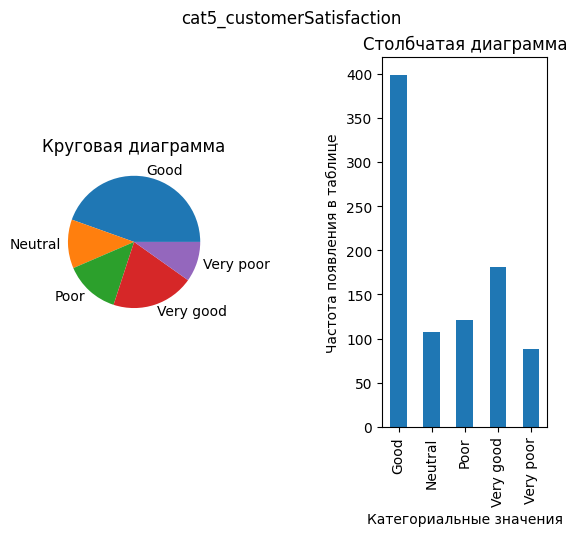

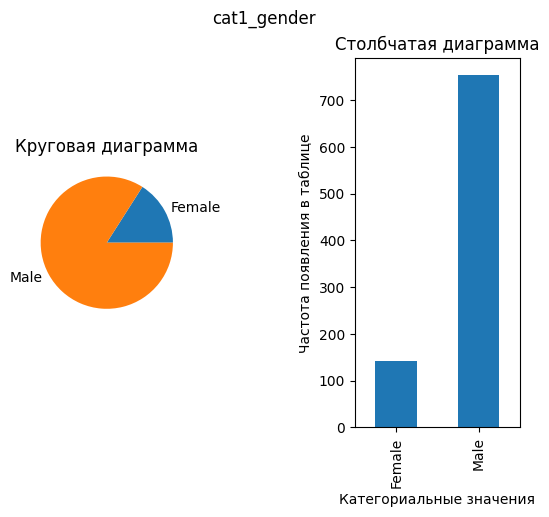

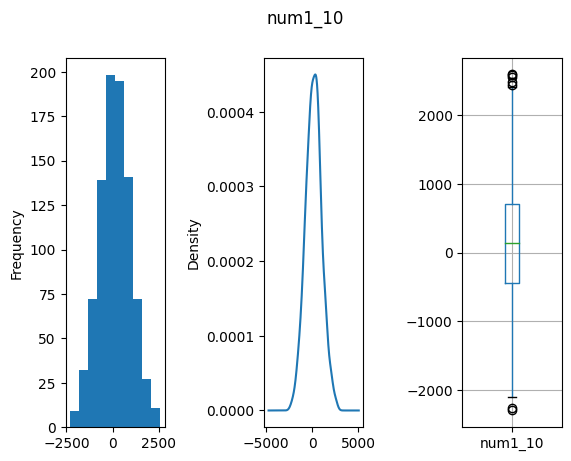

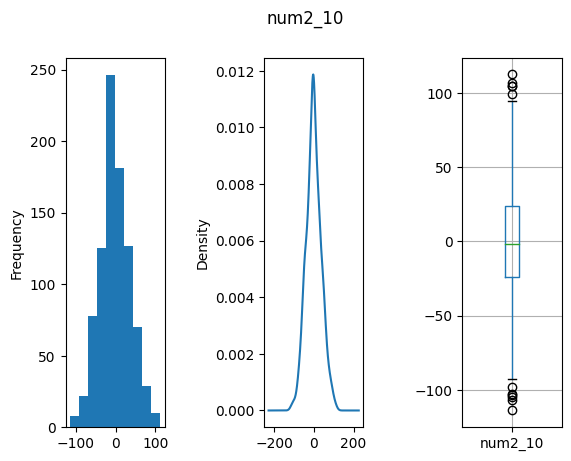

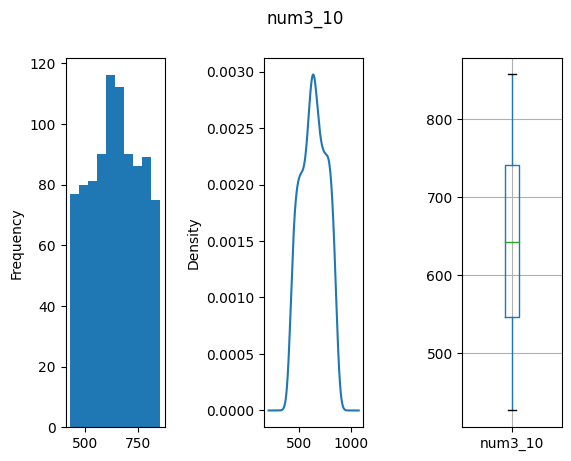

In [25]:
# Графики
# cat5_customerSatisfaction
categorical_plot(data_frame, categorical[0])


# cat1_gender
categorical_plot(data_frame, categorical[1])

# num1_10
numeric_plot(data_frame, numeric[0])

# num2_10
numeric_plot(data_frame, numeric[1])

# num3_10
numeric_plot(data_frame, numeric[2])